In [176]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
from keras.utils import to_categorical

In [178]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [179]:
x_train.shape

(60000, 28, 28)

In [180]:
y_train.shape

(60000,)

In [181]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [186]:
x_train.shape

(60000, 28, 28, 1)

In [188]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [190]:
x_test.shape

(10000, 28, 28, 1)

In [192]:
y_train.shape

(60000,)

In [194]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [196]:
print(np.unique(y_train))

[0. 1.]


In [198]:
x_train = x_train/255
x_test = x_test/255

In [200]:
model = keras.Sequential()

In [202]:
model

<Sequential name=sequential_4, built=False>

In [205]:
model = Sequential()

In [219]:
model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(3,3))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(3,3))
model.add(Dropout(0.2))

C:\Users\Saif\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [221]:
model.add(Flatten())  

In [223]:
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [231]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

In [233]:
model.summary

<bound method Model.summary of <Sequential name=sequential_5, built=True>>

In [235]:
history = model.fit(x_train, y_train, batch_size=30, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 141s 70ms/step - accuracy: 0.4263 - loss: 1.6176 - val_accuracy: 0.9606 - val_loss: 0.1333
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 140s 70ms/step - accuracy: 0.9389 - loss: 0.1954 - val_accuracy: 0.9772 - val_loss: 0.0710
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 140s 70ms/step - accuracy: 0.9586 - loss: 0.1323 - val_accuracy: 0.9836 - val_loss: 0.0523
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 142s 71ms/step - accuracy: 0.9678 - loss: 0.1057 - val_accuracy: 0.9843 - val_loss: 0.0506
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 140s 70ms/step - accuracy: 0.9704 - loss: 0.0944 - val_accuracy: 0.9848 - val_loss: 0.0445
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 142s 71ms/step - accuracy: 0.9744 - loss: 0.0808 - val_accuracy: 0.9865 - val_loss: 0.0435
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 137s 68ms/step - accuracy: 0.9777 - loss: 0.0715 - val_accuracy: 0.9886 - val_loss: 0.0360
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 137s 69ms/step - accuracy: 

<function matplotlib.pyplot.show(close=None, block=None)>

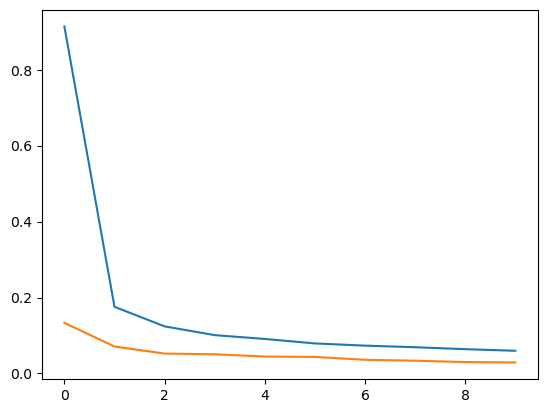

In [237]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

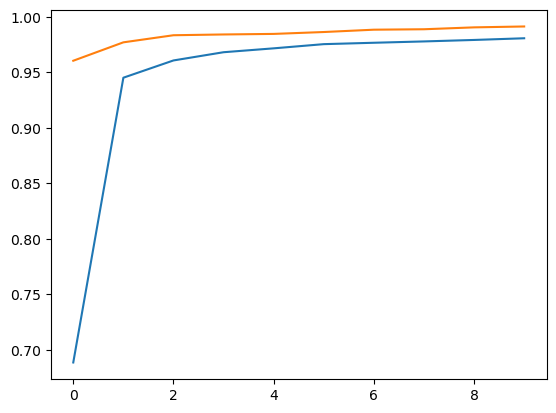

In [239]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show

In [241]:
model

<Sequential name=sequential_5, built=True>

In [243]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 6, 6, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,628 (389.18 KB)

 Trainable params: 99,626 (389.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [245]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9891 - loss: 0.0355


In [247]:
print(test_acc)

0.9915000200271606


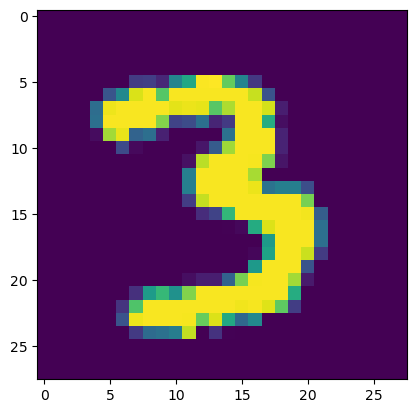

In [249]:
n=500
plt.imshow(x_test[n])
plt.show()


In [253]:
import numpy as np
predicted_values = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


In [255]:
print(predicted_values)

[[4.9729341e-08 4.9205600e-08 5.1245975e-06 ... 9.9999309e-01
  2.6527729e-08 1.0577443e-06]
 [2.4467572e-05 2.1781000e-04 9.9975616e-01 ... 6.0977112e-07
  2.9060976e-07 1.5857202e-08]
 [3.6818325e-05 9.9833894e-01 3.1837360e-05 ... 8.6150342e-04
  3.6923815e-05 3.5431010e-05]
 ...
 [1.8016413e-08 5.0846641e-08 1.0562504e-10 ... 2.4834568e-08
  6.8977215e-08 2.7164415e-06]
 [2.4573035e-08 2.3325755e-12 1.5995645e-09 ... 1.9373479e-11
  3.7353989e-06 2.9830854e-08]
 [9.3091676e-06 4.2116276e-11 7.1733226e-08 ... 7.1408907e-11
  2.9868957e-07 1.0086063e-08]]


In [257]:
print(np.argmax(predicted_values[n]))

3
